## [數據來源](https://www.kaggle.com/ntnu-testimon/paysim1)
* The data simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

This is a sample of 1 row with headers explanation:
* 1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0
* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
* amount - amount of the transaction in local currency.
* nameOrig - customer who started the transaction
* oldbalanceOrg - initial balance before the transaction
* newbalanceOrig - new balance after the transaction
* nameDest - customer who is the recipient of the transaction
* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## [參考資料(一)](https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services)
## [參考資料(二)](https://www.kaggle.com/manohar676/predicting-fraud-in-financial-payment-services/notebook)

#### Paysim synthetic dataset of mobile money transactions. Each step represents an hour of simulation. This dataset is scaled down 1/4 of the original dataset which is presented in the paper "PaySim: A financial mobile money simulator for fraud detection".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Miguel_PC\Google 雲端硬碟\Coding練習\Jupyter_Practice\109_Fall\Senior_Anti-Money_Laundering\dataSet\Synthetic Financial Datasets For Fraud Detection\paySim.csv') 

In [177]:
df = df.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'})

In [178]:
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [179]:
# 看數字資料的統計量
df.describe()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [180]:
df.isnull().values.any()

False

In [181]:
np.shape(df)

(6362620, 11)

In [182]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# 資料視覺化

In [175]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

# 長條圖

<BarContainer object of 5 artists>

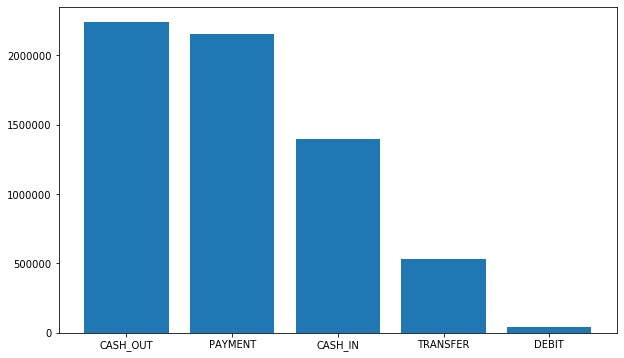

In [9]:
plt.bar(df.type.value_counts().index,df.type.value_counts())

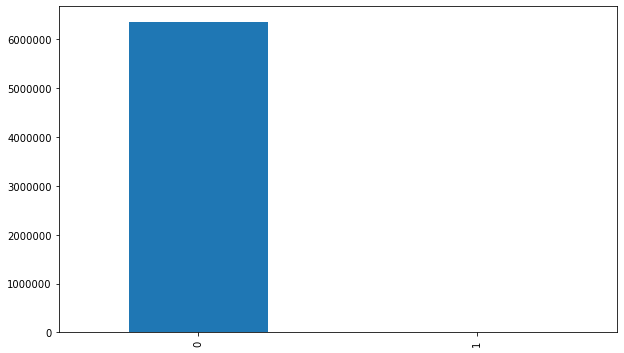

In [10]:
#plt.figure(figsize=(10,6))
df.isFraud.value_counts().plot.bar()

In [11]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

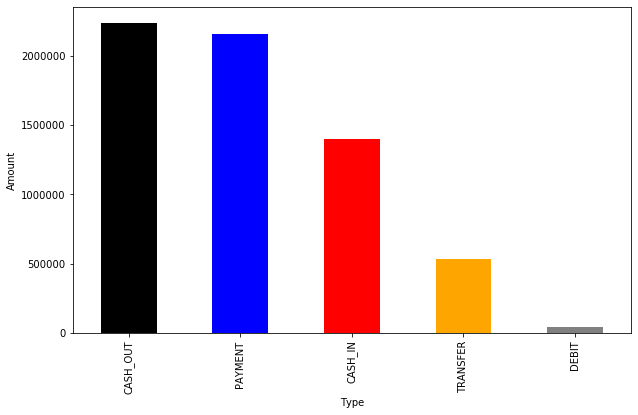

In [12]:
#plt.figure(figsize=(10,6))
plt.ylabel('Amount')
plt.xlabel('Type')
df.type.value_counts().plot.bar(color=['black','blue','red','orange','grey'])
#df.type.value_counts().plot(kind='bar', title='Family Size',color=['black','blue','red','orange','blue'])

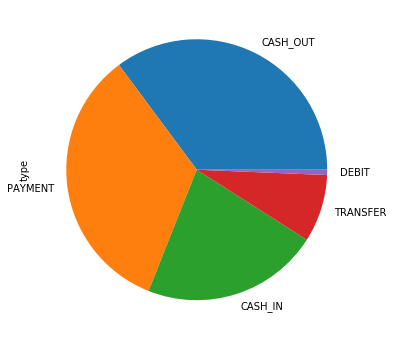

In [13]:
df.type.value_counts().plot.pie()

<BarContainer object of 5 artists>

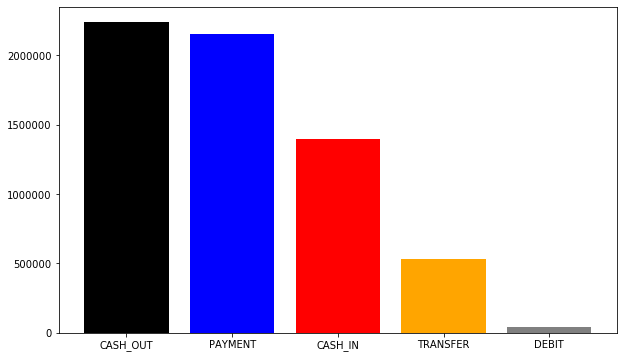

In [23]:
#plt.figure(figsize=(10,6))
plt.bar(df.type.value_counts().index,df.type.value_counts(),color=['black','blue','red','orange','grey'])

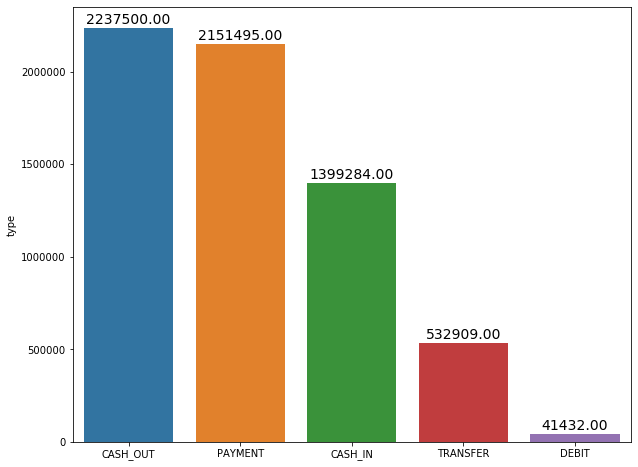

In [24]:
a = df.type.value_counts().to_frame()
plt.figure(figsize=(10,8))
splot = sns.barplot(x=a.index, y=a.columns[0], data=a)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), size=14,textcoords = 'offset points')

(array([2151495.,       0.,  532909.,       0.,       0., 2237500.,
              0.,   41432.,       0., 1399284.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

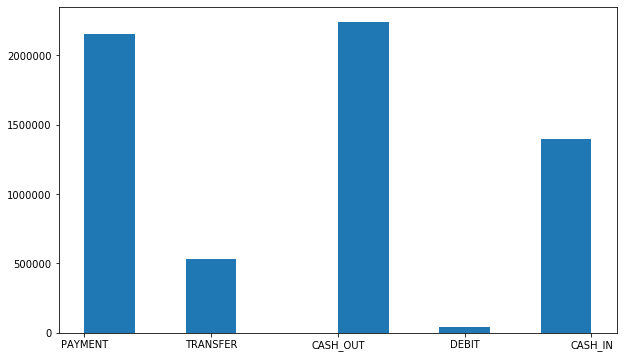

In [25]:
#plt.figure(figsize=(10,6))
plt.hist(df.type)

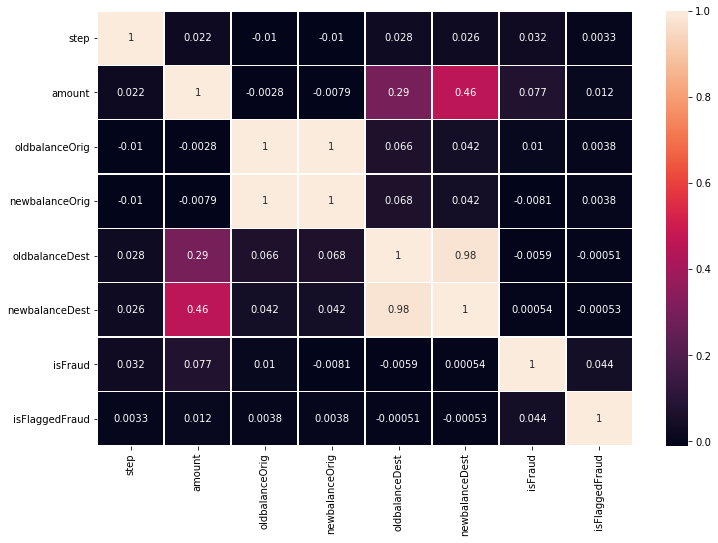

In [183]:
#plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, linewidths=.5)

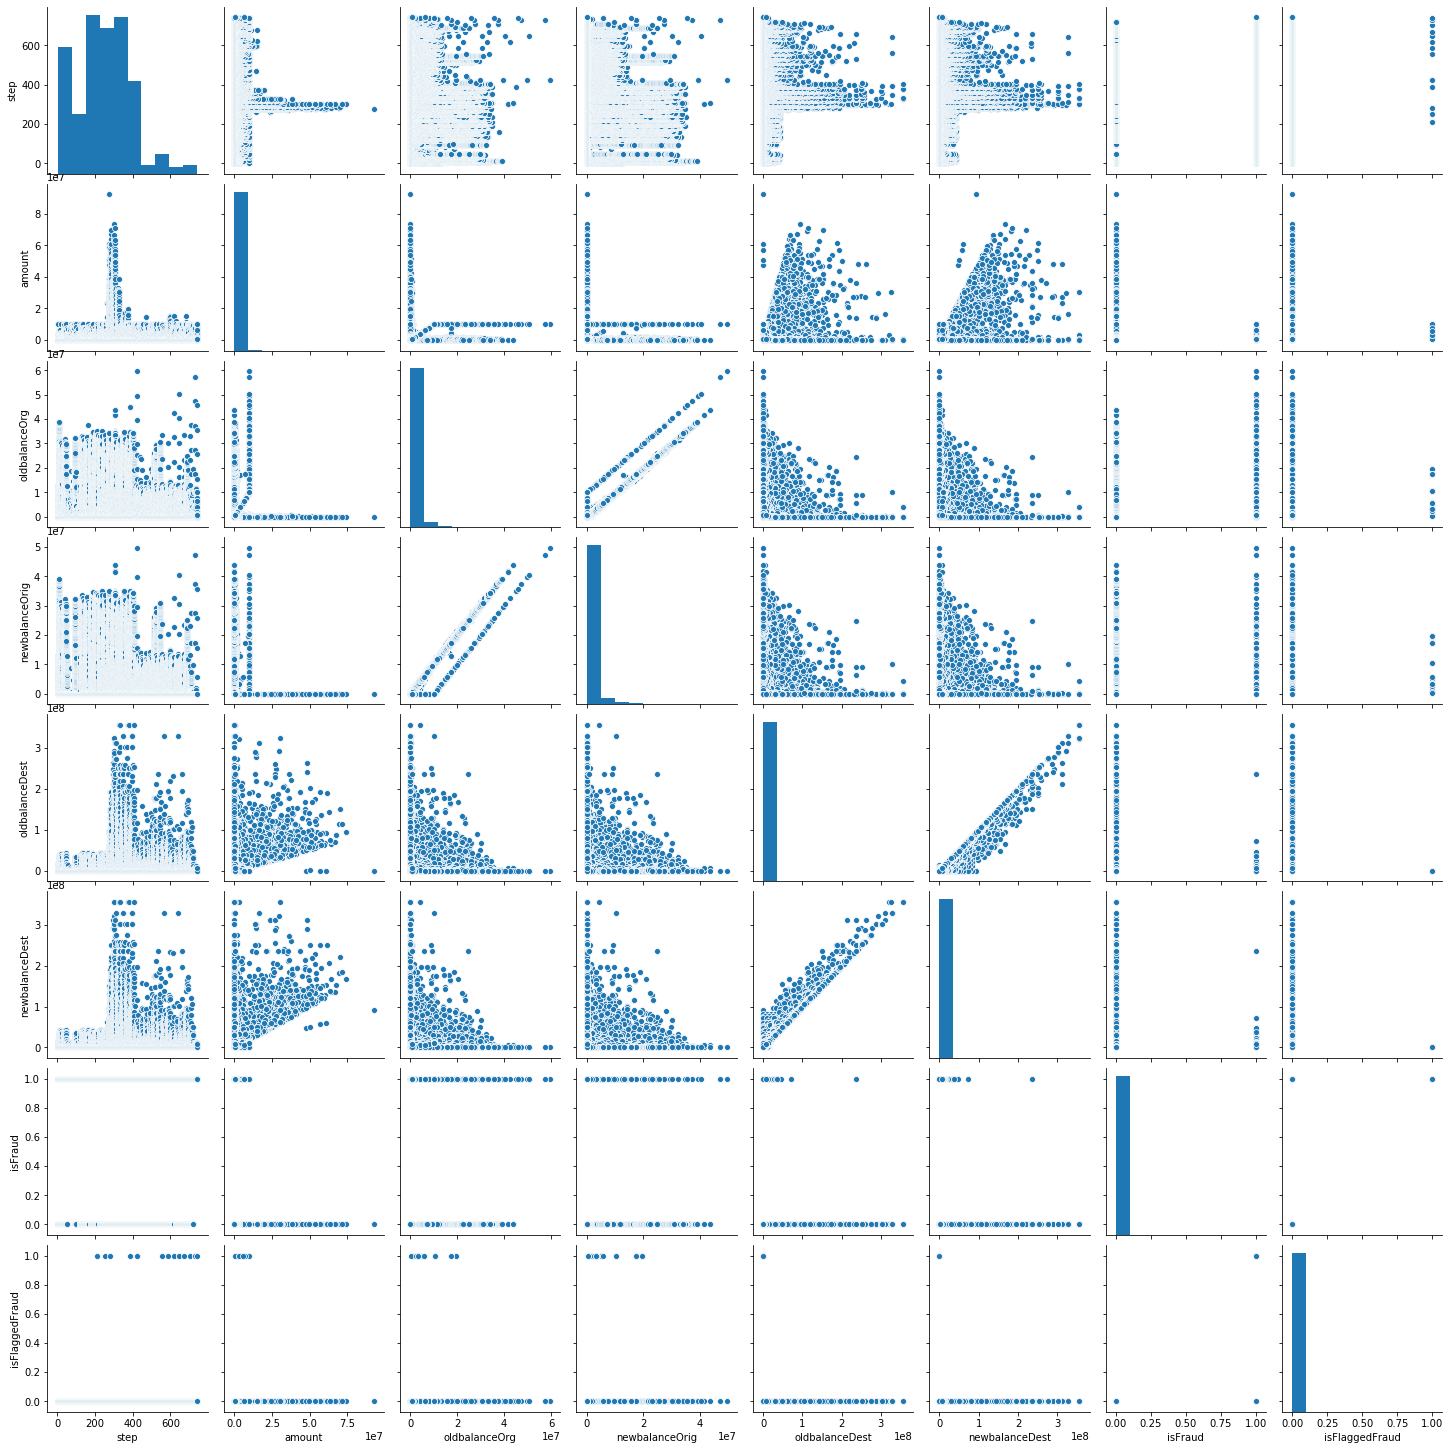

In [173]:
# sns.set_theme(style="ticks")
sns.pairplot(df)
# , hue="species"

C:\Users\Miguel_PC\anaconda3\envs\myenv1\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


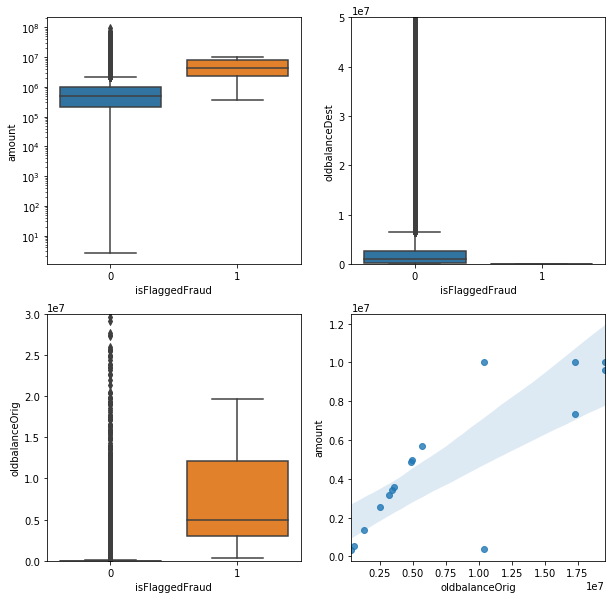

In [184]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrig', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrig', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()

In [28]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [29]:
fraud_gp = df[df['isFraud']==1]

In [30]:
fraud_type = fraud_gp.groupby('type')
fraud_type

In [31]:
fraud_type.size()

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64

In [39]:
fraud_gp.type

2          TRANSFER
3          CASH_OUT
251        TRANSFER
252        CASH_OUT
680        TRANSFER
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 8213, dtype: object

In [40]:
fraud_gp.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [41]:
fraud_gp.type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [42]:
fraud_gp.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [43]:
fraud_gp = df[df['isFraud']==1]
fraud_gp

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


## Exploratory Data Analysis

### Which types of transactions are fraudulent?

* 'TRANSFER' where money is sent to a customer/fraudster
* 'CASH_OUT' where money is sent to a merchant who pays the customer/fraudster in cash.

### Fraud Group 

In [44]:
fraud_gp = df.loc[(df.isFraud==1) | (df.isFlaggedFraud==1)].groupby('type')
fraud_gp.size()

type
CASH_OUT    4116
TRANSFER    4097
dtype: int64

In [45]:
Flaggedfraud_gp = df[df['isFlaggedFraud']==1]
Flaggedfraud_gp.type

2736446    TRANSFER
3247297    TRANSFER
3760288    TRANSFER
5563713    TRANSFER
5996407    TRANSFER
5996409    TRANSFER
6168499    TRANSFER
6205439    TRANSFER
6266413    TRANSFER
6281482    TRANSFER
6281484    TRANSFER
6296014    TRANSFER
6351225    TRANSFER
6362460    TRANSFER
6362462    TRANSFER
6362584    TRANSFER
Name: type, dtype: object

In [46]:
Flaggedfraud_gp.type.unique()

array(['TRANSFER'], dtype=object)

In [47]:
fraud_gp.get_group('TRANSFER')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,0


In [48]:
transfer=df.loc[(df.isFraud==1) & (df.type=='TRANSFER')]
cash_out=df.loc[(df.isFraud==1) & (df.type=='CASH_OUT')]
print('Number of fraudulent cash outs',len(cash_out))
print('Number of fraudulent transfers',len(transfer))

Number of fraudulent cash outs 4116
Number of fraudulent transfers 4097


In [49]:
print(df.loc[df.isFlaggedFraud==1].type.drop_duplicates())

2736446    TRANSFER
Name: type, dtype: object


In [50]:
print("Transfers where isFraud is set",len(transfer))
print("Tranfers where isFlaggedFraud set",len(df.loc[df.isFlaggedFraud==1]))

Transfers where isFraud is set 4097
Tranfers where isFlaggedFraud set 16


* ### Transactions that isFlaggedFraud is set 

In [51]:
# Transactions that Flagged Fraud is set 
df.loc[df.isFlaggedFraud==1].type

2736446    TRANSFER
3247297    TRANSFER
3760288    TRANSFER
5563713    TRANSFER
5996407    TRANSFER
5996409    TRANSFER
6168499    TRANSFER
6205439    TRANSFER
6266413    TRANSFER
6281482    TRANSFER
6281484    TRANSFER
6296014    TRANSFER
6351225    TRANSFER
6362460    TRANSFER
6362462    TRANSFER
6362584    TRANSFER
Name: type, dtype: object

* The origin of isFlaggedFraud is unclear, contrasting with the description provided. 
* The 16 entries (out of 6 million) where the isFlaggedFraud feature is set do not seem to correlate with any explanatory variable. 
* The data is described as isFlaggedFraud being set when an attempt is made to 'TRANSFER' an 'amount' greater than 200,000. 
* In fact, as shown below, isFlaggedFraud can remain not set despite this condition being met.

In [52]:
dftype=df.loc[df.type=='TRANSFER']
flag_set=dftype.loc[dftype.isFlaggedFraud==1]
print(flag_set)

         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C214003857

In [54]:
dftype[dftype.isFlaggedFraud==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [53]:
flag_not_set=dftype.loc[dftype.isFlaggedFraud==0]
amt_flag_unset=flag_not_set.amount.max()
print("Min amount transfered when isFlaggedFraud is set",flag_set.amount.min())
print("Max amount transfered when isFlaggedFraud is not set",amt_flag_unset)

Max amount transfered when isFlaggedFraud is set 353874.22
Max amount transfered when isFlaggedFraud is not set 92445516.64


### Q: Can oldBalanceDest and newBalanceDest determine isFlaggedFraud being set?

In [186]:
dftype.loc[dftype.isFlaggedFraud==1].oldbalanceDest.unique()

array([0.])

In [60]:
old_balance=dftype.loc[dftype.isFlaggedFraud==1].oldbalanceDest.drop_duplicates()
new_balance=dftype.loc[dftype.isFlaggedFraud==1].newbalanceDest.drop_duplicates()
print(old_balance)
print(new_balance)

2736446    0.0
Name: oldbalanceDest, dtype: float64
2736446    0.0
Name: newbalanceDest, dtype: float64


### Ans: Since isFlaggedFraud can remain not set in TRANSFERS where oldBalanceDest and newBalanceDest can both be 0, these conditions do not determine the state of isFlaggedFraud.

In [61]:
print('\nThe number of TRANSFERs where isFlaggedFraud is not set (=0), yet oldBalanceDest = 0 and\
 newBalanceDest = 0:')
print(len(dftype.loc[(dftype.isFlaggedFraud==0) & (dftype.oldbalanceDest==dftype.newbalanceDest)]))


The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0:
4158


In [62]:
print(flag_set.oldbalanceOrg.min(),flag_set.oldbalanceOrg.max())
print(flag_not_set.loc[flag_not_set.oldbalanceOrg==flag_not_set.newbalanceOrig].oldbalanceOrg.min(),flag_not_set.loc[flag_not_set.oldbalanceOrg==flag_not_set.newbalanceOrig].oldbalanceOrg.max())

353874.22 19585040.37
0.0 575667.54


In [187]:
print("isFlaggedFraud is set and no duplicates",len(df.loc[df.isFlaggedFraud==1].nameOrig.drop_duplicates()))
print("Number of duplicates when isFlaggedFraud is not set",len(df.loc[df.isFlaggedFraud==0].nameOrig)-len(df.loc[df.isFlaggedFraud==0].nameOrig.drop_duplicates()))

isFlaggedFraud is set and no duplicates 16
Number of duplicates when isFlaggedFraud is not set 9313


In [89]:
print('\nHave originators of transactions flagged as fraud transacted more than once? {}'\
.format((df.loc[df.isFlaggedFraud==1].nameOrig.isin(pd.concat([df.loc[df.isFlaggedFraud==0].nameOrig, \
                                    df.loc[df.isFlaggedFraud==0].nameDest]))).any())) # False

print('\nHave destinations for transactions flagged as fraud initiated\
 other transactions? {}'.format((df.loc[df.isFlaggedFraud==1].nameDest.isin(df.loc[df.isFlaggedFraud==0].nameOrig)).any())) # False

# Since only 2 destination accounts of 16 that have 'isFlaggedFraud' set have been
# destination accounts more than once,
# clearly 'isFlaggedFraud' being set is independent of whether a 
# destination account has been used before or not

print('\nHow many destination accounts of transactions flagged as fraud have been destination \
accounts more than once?: {}'.format(sum(df.loc[df.isFlaggedFraud==1].nameDest.isin(df.loc[df.isFlaggedFraud==0].nameDest)))) # 2


Have originators of transactions flagged as fraud transacted more than once? False

Have destinations for transactions flagged as fraud initiated other transactions? False

How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 2


In [193]:
# Let us see which two
df.loc[df.isFlaggedFraud==1][df.loc[df.isFlaggedFraud==1].nameDest.isin(df.loc[df.isFlaggedFraud==0].nameDest)]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1


## Are expected merchant accounts accordingly labelled?

In [64]:
print("Cash in transactions where merchant pays")
print(df.loc[df.type=='CASH_IN'].nameOrig.str.contains('M').any())

Cash in transactions where merchant pays
False


In [65]:
print("Cash out transactions where the merchant is paid")
print(df.loc[df.type=='CASH_OUT'].nameDest.str.contains('M').any())

Cash out transactions where the merchant is paid
False


In [90]:
print("Are there merchants in originator accounts:",df.nameOrig.str.contains('M').any())

Are there merchants in originator accounts: False


In [91]:
print("Are there merchants in destination accounts except Payment:",df.loc[df.type!='PAYMENT'].nameDest.str.contains('M').any())

Are there merchants in destination accounts except Payment: False


### Are there account labels common to fraudulent TRANSFERs and CASH_OUTs?

In [55]:
transfer.nameDest.isin(cash_out.nameOrig).any()

False

### Could destination accounts for fraudulent TRANSFERs originate CASHOUTs that are not detected and are labeled as genuine? It turns out there are 3 such accounts.

In [92]:
dfNotFraud = df[df['isFraud']==0]

In [93]:
transfer.loc[transfer.nameDest.isin(dfNotFraud[dfNotFraud.type== 'CASH_OUT'].nameOrig.drop_duplicates())]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0


In [58]:
# the TRANSFER with dest. name isfraud = True but the cashout with orig. name that isfraud = False

In [59]:
dfNotFraud[dfNotFraud.nameOrig == 'C1714931087']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6149940,546,CASH_OUT,18091.05,C1714931087,197227.0,179135.95,C1339132632,66177.84,84268.89,0,0


### However, 2 out of 3 of these accounts first make a genuine CASH_OUT and only later (as evidenced by the time step) receive a fraudulent TRANSFER. Thus, fraudulent transactions are not indicated by the nameOrig and nameDest features.

In [94]:
print("fraudulent tranfer to C1714931087 occurs at step 65 and cashout from this account occurs at step",notfraud.loc[(notfraud.type=='CASH_OUT') & (notfraud.nameOrig=="C1714931087")].step.values)
print("fraudulent tranfer to C423543548 occurs at step 486 and cashout from this account occurs at step",notfraud.loc[(notfraud.type=='CASH_OUT') & (notfraud.nameOrig=="C423543548")].step.values)
print("fraudulent tranfer to C1023330867 occurs at step 738 and cashout from this account occurs at step",notfraud.loc[(notfraud.type=='CASH_OUT') & (notfraud.nameOrig=="C1023330867")].step.values)

fraudulent tranfer to C1714931087 occurs at step 65 and cashout from this account occurs at step [546]
fraudulent tranfer to C423543548 occurs at step 486 and cashout from this account occurs at step [185]
fraudulent tranfer to C1023330867 occurs at step 738 and cashout from this account occurs at step [132]


# Data Cleaning

In [71]:
X=df.loc[(df.type=='TRANSFER') | (df.type=='CASH_OUT')]
X=X.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
Y=X['isFraud']

In [72]:
X.loc[X.type=='TRANSFER','type']=0
X.loc[X.type=='CASH_OUT','type']=1
X.type=X.type.astype(int)

In [73]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [74]:
Xfraud=X.loc[Y==1]
Xnonfraud=X.loc[Y==0]

In [75]:
print("The fraction of fraudulent transactions with oldbalanceDest= newbalanceDest= 0 although the transacted amount is non-zero is:\n",len(Xfraud.loc[(Xfraud.oldbalanceDest==0) & (Xfraud.newbalanceDest==0)])/len(Xfraud))

The fraction of fraudulent transactions with oldbalanceDest= newbalanceDest= 0 although the transacted amount is non-zero is:
 0.49628637525873615


In [76]:
print("The fraction of genuine transactions with oldbalanceDest= newbalanceDest= 0 although the transacted amount is non-zero is:\n",len(Xnonfraud.loc[(X.oldbalanceDest==0) & (X.newbalanceDest==0)])/len(Xnonfraud))

The fraction of genuine transactions with oldbalanceDest= newbalanceDest= 0 although the transacted amount is non-zero is:
 0.0006176245277308345


In [77]:
print("The fraction of fraudulent transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:\n",len(Xfraud.loc[(Xfraud.oldbalanceOrg==0) & (Xfraud.newbalanceOrig==0)])/len(Xfraud))

The fraction of fraudulent transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:
 0.00499208571776452


In [78]:
print("The fraction of genuine transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:\n",len(Xnonfraud.loc[(Xnonfraud.oldbalanceOrg==0) & (Xnonfraud.newbalanceOrig==0)])/len(Xnonfraud))

The fraction of genuine transactions with oldbalanceOrg= newbalanceOrig= 0 although the transacted amount is non-zero is:
 0.4737321319703598


In [79]:
X.loc[(X.oldbalanceDest==0) & (X.newbalanceDest==0) & (X.amount!=0),['oldbalanceDest','newbalanceDest']]=-1
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.0,0.0,-1.0,-1.00,1
3,1,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [80]:
X.loc[(X.oldbalanceOrg==0) & (X.newbalanceOrig==0) & (X.amount!=0),['oldbalanceOrg','newbalanceOrig']]=np.nan

In [81]:
X['errorBalOrig']=X.oldbalanceOrg+X.amount-X.newbalanceOrig
X['errorBalDest']=X.oldbalanceDest+X.amount-X.newbalanceDest

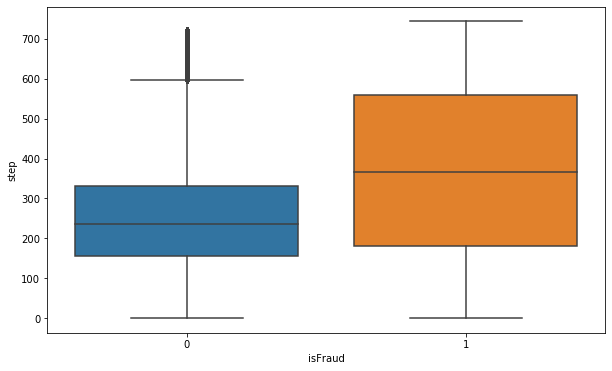

In [82]:
sns.boxplot(x='isFraud',y='step',data=X)

In [83]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)

#X = X.loc[np.random.choice(X.index, 100000, replace = False)]

Y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

The data has several transactions with zero balances in the destination account both before and after a non-zero amount is transacted. The fraction of such transactions, where zero likely denotes a missing value, is much larger in fraudulent (50%) compared to genuine transactions (0.06%).

In [96]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.4955558261293072

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0006176245277308345


Since the destination account balances being zero is a strong indicator of fraud, we do not impute the account balance (before the transaction is made) with a statistic or from a distribution with a subsequent adjustment for the amount transacted. Doing so would mask this indicator of fraud and make fraudulent transactions appear genuine. Instead, below we replace the value of 0 with -1 which will be more useful to a suitable machine-learning (ML) algorithm detecting fraud.

In [98]:
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1

The data also has several transactions with zero balances in the originating account both before and after a non-zero amount is transacted. In this case, the fraction of such transactions is much smaller in fraudulent (0.3%) compared to genuine transactions (47%). Once again, from similar reasoning as above, instead of imputing a numerical value we replace the value of 0 with a null value.

In [103]:
X = X.rename(columns={'oldbalanceOrg': 'oldbalanceOrig'})

In [104]:
X.loc[(X.oldbalanceOrig == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

In [105]:
X.head()

,step,type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,oldBalanceDest,newBalanceDest,oldBalanceOrig,newBalanceOrig
2,1,0,181.00,181.0,0.0,0.0,0.00,-1.0,-1.0,NaN,NaN
3,1,1,181.00,181.0,0.0,21182.0,0.00,NaN,NaN,NaN,NaN
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,NaN,NaN,NaN,NaN
19,1,0,215310.30,705.0,0.0,22425.0,0.00,NaN,NaN,NaN,NaN
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,NaN,NaN,NaN,NaN


# Feature Engineering

Motivated by the possibility of zero-balances serving to differentiate between fraudulent and genuine transactions, we take the data-imputation of section 3.1 a step further and create 2 new features (columns) recording errors in the originating and destination accounts for each transaction. These new features turn out to be important in obtaining the best performance from the ML algorithm that we will finally use.

In [106]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrig
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

The best way of confirming that the data contains enough information so that a ML algorithm can make strong predictions, is to try and directly visualize the differences between fraudulent and genuine transactions. Motivated by this principle, I visualize these differences in several ways in the plots below.

In [107]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

### Dispersion over time
The plot below shows how the fraudulent and genuine transactions yield different fingerprints when their dispersion is viewed over time. It is clear that fradulent transactions are more homogenously distributed over time compared to genuine transactions. Also apparent is that CASH-OUTs outnumber TRANSFERs in genuine transactions, in contrast to a balanced distribution between them in fraudulent transactions. Note that the the width of each 'fingerprint' is set by the 'jitter' parameter in the plotStrip function above which attempts to separate out and plot transactions occuring at the same time with different abscissae.

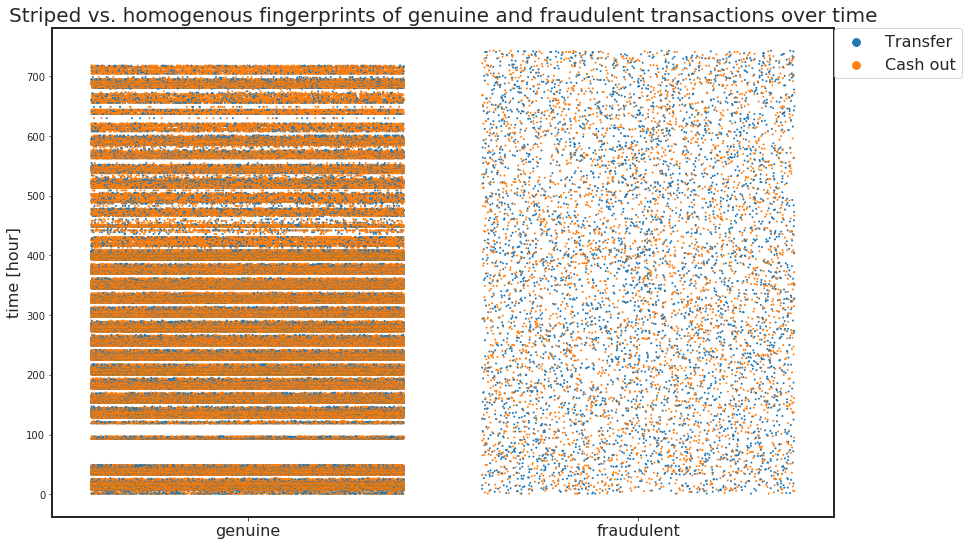

In [108]:
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

## Dispersion over amount
The two plots below shows that although the presence of fraud in a transaction can be discerned by the original amount feature, the new errorBalanceDest feature is more effective at making a distinction.

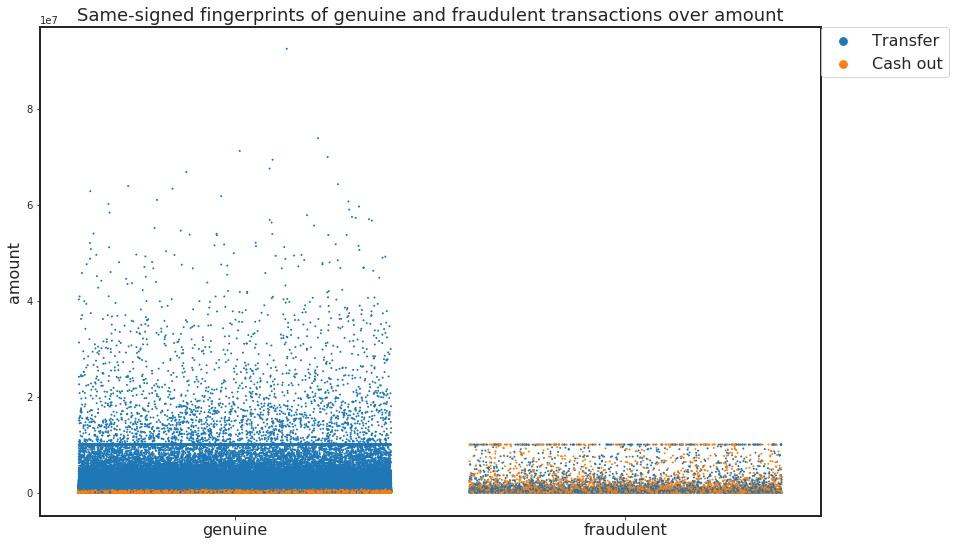

In [109]:
limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine \
and fraudulent transactions over amount', size = 18);

## Dispersion over error in balance in destination accounts

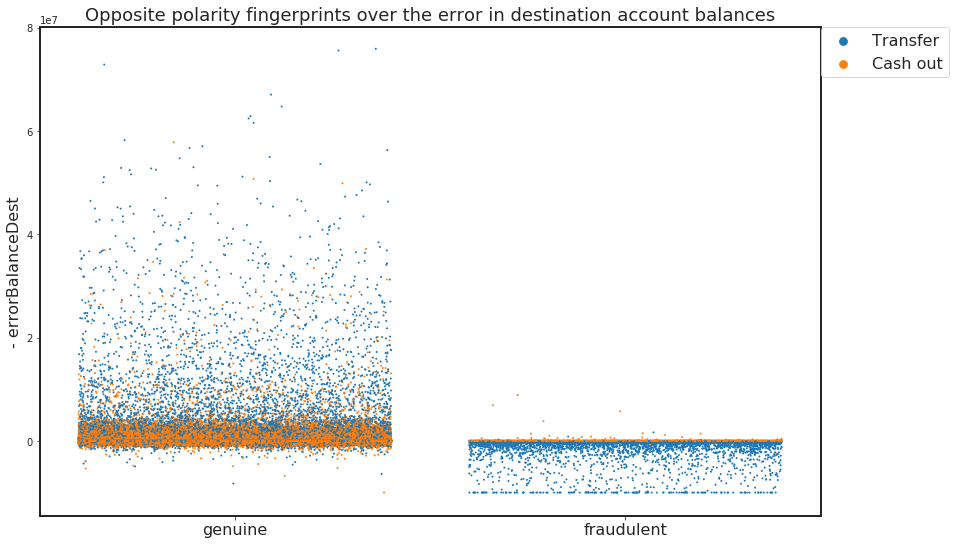

In [110]:
limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('- errorBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in \
destination account balances', size = 18);

## Separating out genuine from fraudulent transactions
The 3D plot below distinguishes best between fraud and non-fraud data by using both of the engineered error-based features. Clearly, the original step feature is ineffective in seperating out fraud. Note the striped nature of the genuine data vs time which was aniticipated from the figure in section 5.1.

In [117]:
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D

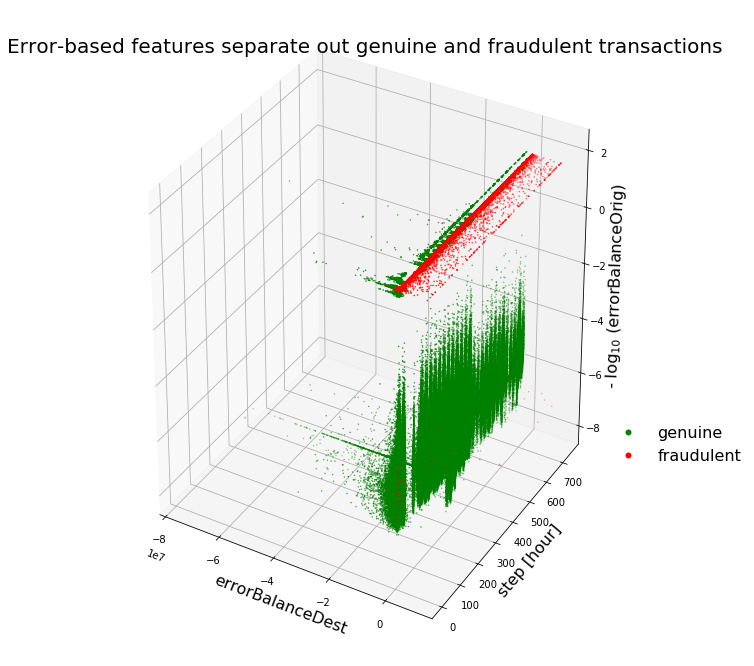

In [118]:
# Long computation in this cell (~2.5 minutes)
x = 'errorBalanceDest'
y = 'step'
z = 'errorBalanceOrig'
zOffset = 0.02
limit = len(X)

sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

fig = plt.figure(figsize = (10, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.loc[Y == 0, x][:limit], X.loc[Y == 0, y][:limit], \
  -np.log10(X.loc[Y == 0, z][:limit] + zOffset), c = 'g', marker = '.', \
  s = 1, label = 'genuine')
    
ax.scatter(X.loc[Y == 1, x][:limit], X.loc[Y == 1, y][:limit], \
  -np.log10(X.loc[Y == 1, z][:limit] + zOffset), c = 'r', marker = '.', \
  s = 1, label = 'fraudulent')

ax.set_xlabel(x, size = 16); 
ax.set_ylabel(y + ' [hour]', size = 16); 
ax.set_zlabel('- log$_{10}$ (' + z + ')', size = 16)
ax.set_title('Error-based features separate out genuine and fraudulent \
transactions', size = 20)

plt.axis('tight')
ax.grid(1)

noFraudMarker = mlines.Line2D([], [], linewidth = 0, color='g', marker='.',
                          markersize = 10, label='genuine')
fraudMarker = mlines.Line2D([], [], linewidth = 0, color='r', marker='.',
                          markersize = 10, label='fraudulent')

plt.legend(handles = [noFraudMarker, fraudMarker], \
           bbox_to_anchor = (1.20, 0.38 ), frameon = False, prop={'size': 16});

## Fingerprints of genuine and fraudulent transactions
Smoking gun and comprehensive evidence embedded in the dataset of the difference between fraudulent and genuine transactions is obtained by examining their respective correlations in the heatmaps below.

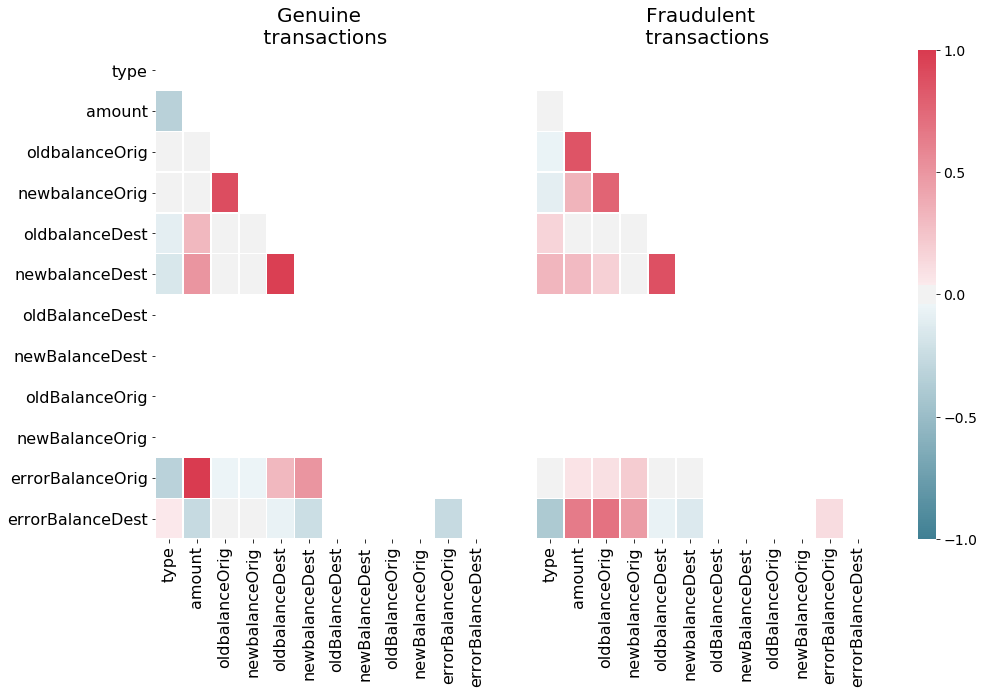

In [119]:
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]
                  
correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Genuine \n transactions', size = 20)

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent \n transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

# Machine Learning to Detect Fraud in Skewed Data

Having obtained evidence from the plots above that the data now contains features that make fraudulent transactions clearly detectable, the remaining obstacle for training a robust ML model is the highly imbalanced nature of the data.

In [163]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [164]:
print('skew = {}'.format( len(Xfraud) / float(len(X)) ))

skew = 0.002964544224336551


In [165]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, \
                                                random_state = randomState)

In [166]:
# Long computation in this cell (~1.8 minutes)
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.9984750084559626


### What are the important features for the ML model?
The figure below shows that the new feature errorBalanceOrig that we created is the most relevant feature for the model. The features are ordered based on the number of samples affected by splits on those features.

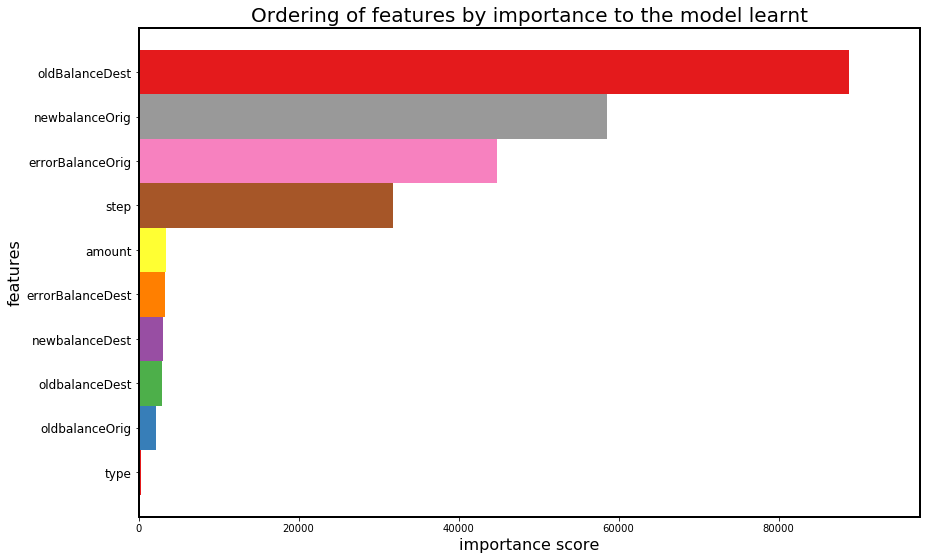

In [167]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

### Visualization of ML model
The root node in the decision tree visualized below is indeed the feature errorBalanceOrig, as would be expected from its high significance to the model.

In [168]:
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

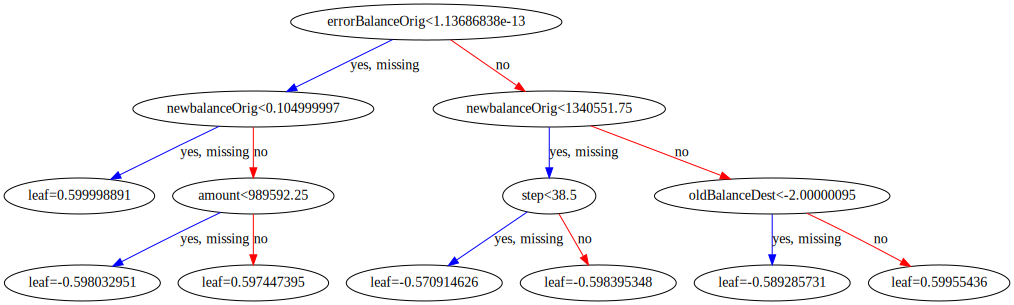

In [169]:
to_graphviz(clf)

### Bias-variance tradeoff
The model we have learnt has a degree of bias and is slighly underfit. This is indicated by the levelling in AUPRC as the size of the training set is increased in the cross-validation curve below. The easiest way to improve the performance of the model still further is to increase the max_depth parameter of the XGBClassifier at the expense of the longer time spent learning the model. Other parameters of the classifier that can be adjusted to correct for the effect of the modest underfitting include decreasing min_child_weight and decreasing reg_lambda.

In [170]:
# Long computation in this cell (~6 minutes)

trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), trainX,\
                                         trainY, scoring = 'average_precision')

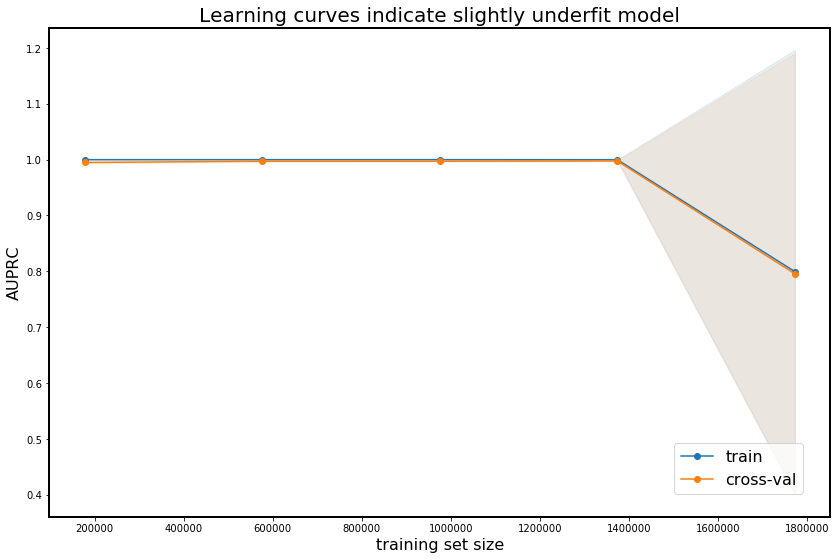

In [171]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);